In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture,
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

seed = 3  # random seed

# Initial Clustering

- Algorithms:  
    - K-Means: 
      - interesting and interpretable results
    - MeanShift
    - DBSCAN:
      - not interesting, too many tiny clusters (single player) and a few massive clusters
    - EM Gaussian Mixture

In [2]:
df = pd.read_csv('../data/data_pca25.csv', index_col=0)
df66 = pd.read_csv('../data/data_pca66.csv', index_col=0)
df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24
A.C. Green 1996,5.029844,-2.835885,-0.414933,-0.492939,2.698017,1.061725,0.177164,1.374863,-3.067314,0.722753,...,-0.884453,-1.010801,-0.207818,-0.547630,0.806682,1.022561,-0.047353,-0.147782,0.344499,0.132793
Aaron McKie 1996,-2.600083,-1.925555,-2.843974,-1.042675,0.603503,-2.175523,1.278706,1.525222,-0.095696,-0.974693,...,-0.524675,0.832122,-0.831046,1.482515,0.111291,0.396549,-0.026602,-0.085853,-0.093068,0.295314
Adam Keefe 1996,6.500730,-3.015961,-1.444161,-0.124259,2.182097,-2.216806,-1.109648,2.042181,1.126785,1.171175,...,-0.181963,-0.954723,-0.477892,0.178708,0.655030,-0.209013,-0.073784,-0.167154,-0.136384,-0.241275
Allan Houston 1996,-4.164673,0.316982,1.997717,1.762263,-0.260672,0.949600,-1.450104,0.798079,0.174885,-2.881861,...,-0.013648,0.288336,0.236808,-0.890745,0.178720,0.274665,0.264978,-0.034637,0.079247,-0.011079
Allen Iverson 1996,-5.596375,6.694431,-1.742679,-0.492014,0.000180,-1.436437,0.073070,-1.072195,-1.250783,-1.487440,...,0.047805,-0.166307,0.877110,-1.307260,1.175308,0.087891,-0.240083,-0.358132,-0.450089,0.058086


## K-Means

In [66]:
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(df)

## cluster 4 is full of stars

KMeans(n_clusters=10)

### Elbow Method for determing number of clusters

In [3]:
def kmeans_elbow(data, n_clusters):
    interia_vals = []
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n, init='k-means++', random_state=seed)
        cluster_labels = kmeans.fit_predict(data)
        interia_vals.append(kmeans.inertia_)

    sns.scatterplot(data=interia_vals)
    plt.xlabel('# of clusters')
    plt.ylabel('kmeans interia')
    plt.title('kmeans interia for n clusters')

    return interia_vals

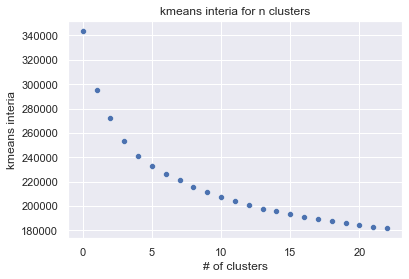

In [9]:
range_n_clusters = [n for n in range(2, 25)]
scores = kmeans_elbow(df, range_n_clusters)

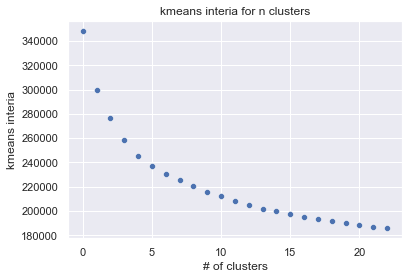

In [8]:
## checking if any noticable diff with 66 dim data
range_n_clusters = [n for n in range(2, 25)]
scores = kmeans_elbow(df66, range_n_clusters)

### Silhoutte Analysis for determining number of clsuters

In [4]:
def kmeans_silhoutte(data, n_clusters):
    scores = []
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n, init='k-means++', random_state=seed)
        cluster_labels = kmeans.fit_predict(data)
        silhoutte_score = silhouette_score(data, cluster_labels)
        scores.append(silhoutte_score)

    sns.scatterplot(data=scores)
    plt.xlabel('# of clusters')
    plt.ylabel('silhouette score')
    plt.title('Silouette scores for n clusters')

    return scores

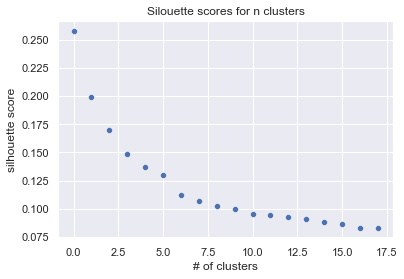

In [108]:
range_n_clusters = [n for n in range(2, 20)]
scores = kmeans_silhoutte(df, range_n_clusters)

### PCA Components as centriods

In [5]:
def kmeans_elbow_pca(data, n_clusters):
    interia_vals = []
    for n in n_clusters:
        pca = PCA(n_components=n)
        pca.fit(data)
        kmeans = KMeans(init=pca.components_, n_init=1, n_clusters=n, random_state=seed)
        cluster_labels = kmeans.fit_predict(data)
        interia_vals.append(kmeans.inertia_)

    sns.scatterplot(data=interia_vals)
    plt.xlabel('# of clusters')
    plt.ylabel('kmeans interia')
    plt.title('kmeans interia for n clusters')

    return interia_vals

[348385.35092564666,
 299958.01736662205,
 277284.4443959213,
 258076.40951916514,
 245362.18049818015,
 237198.91229809122,
 231622.7527380379,
 225575.04181445183,
 221383.10580565655,
 217406.34765141722,
 213714.69485435158,
 208562.20032973957,
 206185.1672929694,
 202784.60266654304,
 200047.4053358687,
 199219.6558638213,
 195447.40320876834,
 193744.290688308]

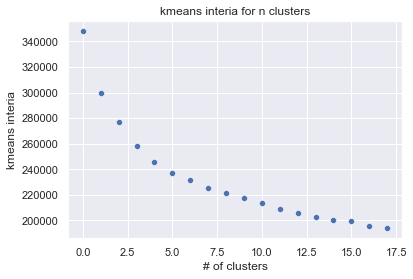

In [35]:
data = pd.read_csv('../data/data_transformed.csv', index_col=0)
range_n_clusters = [n for n in range(2, 20)]
kmeans_elbow_pca(data, range_n_clusters)

### Looking at clusters

In [37]:
## inital invest with 10 clusters

n_clusters = 10
df_km['cluster'] = KMeans(10).fit_predict(df)
df_km['cluster'].value_counts()

5    869
8    843
7    797
0    771
9    769
4    760
3    676
6    672
2    588
1    501
Name: cluster, dtype: int64

In [42]:
df_km[df_km['cluster'] == 3].index[0:50]

Index(['Antoine Walker 1996', 'Carlos Rogers 1996', 'Cedric Ceballos 1996',
       'Chris Mills 1996', 'Chris Webber 1996', 'Detlef Schrempf 1996',
       'Don MacLean 1996', 'Donyell Marshall 1996', 'LaPhonso Ellis 1996',
       'Larry Johnson 1996', 'Rick Fox 1996', 'Rodney Rogers 1996',
       'Sam Perkins 1996', 'Sean Elliott 1996', 'Todd Day 1996',
       'Toni Kukoc 1996', 'Billy Owens 1997', 'Cedric Ceballos 1997',
       'Chris Mills 1997', 'Chris Webber 1997', 'Clifford Robinson 1997',
       'David Benoit 1997', 'Detlef Schrempf 1997', 'Donyell Marshall 1997',
       'Jamal Mashburn 1997', 'Keith Van Horn 1997', 'LaPhonso Ellis 1997',
       'Lamond Murray 1997', 'Nick Anderson 1997', 'Rasheed Wallace 1997',
       'Rodney Rogers 1997', 'Sam Mitchell 1997', 'Tim Thomas 1997',
       'Antoine Walker 1998', 'Clifford Robinson 1998', 'Detlef Schrempf 1998',
       'Dirk Nowitzki 1998', 'Donyell Marshall 1998', 'Glenn Robinson 1998',
       'Jamal Mashburn 1998', 'Lamond Murray 1

In [66]:
player = 'LeBron'
df[df.index.str.contains(player)]['cluster']

player = 'Kobe'
df[df.index.str.contains(player)]['cluster']

player = 'Gary Payton'
df[df.index.str.contains(player)]['cluster']

player = "Shaquille O'Neal"
df[df.index.str.contains(player)]['cluster']

player = "Dwight Howard"
df[df.index.str.contains(player)]['cluster']

player = "Eddie House"
df[df.index.str.contains(player)]['cluster']

player = "Dirk"
df[df.index.str.contains(player)]['cluster']

player = "James Harden"
df[df.index.str.contains(player)]['cluster']

player = "JJ Redick"
df[df.index.str.contains(player)]['cluster']

player = "Kevin Durant"
df[df.index.str.contains(player)]['cluster']

player = "Klay Thompson"
df[df.index.str.contains(player)]['cluster']

player = "Yao Ming"
df[df.index.str.contains(player)]['cluster']

player = "Paul Pierce"
df[df.index.str.contains(player)]['cluster']

player = "Kevin Garnett"
df[df.index.str.contains(player)]['cluster']

player = "Pau Gasol"
df[df.index.str.contains(player)]['cluster']

player = "Derrick Rose"
df[df.index.str.contains(player)]['cluster']

player = "Steve Nash"
df[df.index.str.contains(player)]['cluster']

player = "Deron Williams"
df[df.index.str.contains(player)]['cluster']

player = "Jason Kidd"
df[df.index.str.contains(player)]['cluster']

player = "Paul George"
df[df.index.str.contains(player)]['cluster']

player = "Russell Westbrook"
df[df.index.str.contains(player)]['cluster']

player = "Lou Williams"
df[df.index.str.contains(player)]['cluster']

player = "Jamal Crawford"
df[df.index.str.contains(player)]['cluster']

player = "Allen Iverson"
df[df.index.str.contains(player)]['cluster']

player = "Carmelo Anthony"
df[df.index.str.contains(player)]['cluster']

player = "Ben Wallace"
df[df.index.str.contains(player)]['cluster']

player = "Danny Granger"
df[df.index.str.contains(player)]['cluster']

player = "Roy Hibbert"
df[df.index.str.contains(player)]['cluster']

player = "Lance Stephenson"
df_km[df_km.index.str.contains(player)]['cluster']

LeBron James 2003    1
LeBron James 2004    1
LeBron James 2005    1
LeBron James 2006    1
LeBron James 2007    1
LeBron James 2008    1
LeBron James 2009    1
LeBron James 2010    1
LeBron James 2011    1
LeBron James 2012    1
LeBron James 2013    1
LeBron James 2014    1
LeBron James 2015    1
LeBron James 2016    1
LeBron James 2017    1
LeBron James 2018    1
LeBron James 2019    1
Name: cluster, dtype: int32

Kobe Bryant 1996    4
Kobe Bryant 1997    1
Kobe Bryant 1998    1
Kobe Bryant 1999    1
Kobe Bryant 2000    1
Kobe Bryant 2001    1
Kobe Bryant 2002    1
Kobe Bryant 2003    1
Kobe Bryant 2004    1
Kobe Bryant 2005    1
Kobe Bryant 2006    1
Kobe Bryant 2007    1
Kobe Bryant 2008    1
Kobe Bryant 2009    1
Kobe Bryant 2010    1
Kobe Bryant 2011    1
Kobe Bryant 2012    1
Kobe Bryant 2014    1
Kobe Bryant 2015    1
Name: cluster, dtype: int32

Gary Payton 1996    1
Gary Payton 1997    4
Gary Payton 1998    4
Gary Payton 1999    1
Gary Payton 2000    1
Gary Payton 2001    1
Gary Payton 2002    4
Gary Payton 2003    4
Gary Payton 2004    9
Gary Payton 2005    9
Gary Payton 2006    9
Name: cluster, dtype: int32

Shaquille O'Neal 1996    0
Shaquille O'Neal 1997    0
Shaquille O'Neal 1998    0
Shaquille O'Neal 1999    0
Shaquille O'Neal 2000    0
Shaquille O'Neal 2001    0
Shaquille O'Neal 2002    0
Shaquille O'Neal 2003    0
Shaquille O'Neal 2004    0
Shaquille O'Neal 2005    0
Shaquille O'Neal 2006    0
Shaquille O'Neal 2007    8
Shaquille O'Neal 2008    0
Shaquille O'Neal 2009    0
Shaquille O'Neal 2010    8
Name: cluster, dtype: int32

Dwight Howard 2004    8
Dwight Howard 2005    0
Dwight Howard 2006    0
Dwight Howard 2007    0
Dwight Howard 2008    0
Dwight Howard 2009    0
Dwight Howard 2010    0
Dwight Howard 2011    0
Dwight Howard 2012    0
Dwight Howard 2013    0
Dwight Howard 2014    0
Dwight Howard 2015    8
Dwight Howard 2016    8
Dwight Howard 2017    0
Dwight Howard 2019    8
Name: cluster, dtype: int32

Eddie House 2001    7
Eddie House 2002    7
Eddie House 2003    9
Eddie House 2004    7
Eddie House 2005    7
Eddie House 2006    7
Eddie House 2007    5
Eddie House 2008    5
Eddie House 2009    5
Eddie House 2010    5
Name: cluster, dtype: int32

Dirk Nowitzki 1998    3
Dirk Nowitzki 1999    3
Dirk Nowitzki 2000    3
Dirk Nowitzki 2001    3
Dirk Nowitzki 2002    1
Dirk Nowitzki 2003    3
Dirk Nowitzki 2004    1
Dirk Nowitzki 2005    1
Dirk Nowitzki 2006    1
Dirk Nowitzki 2007    1
Dirk Nowitzki 2008    1
Dirk Nowitzki 2009    1
Dirk Nowitzki 2010    1
Dirk Nowitzki 2011    1
Dirk Nowitzki 2012    3
Dirk Nowitzki 2013    1
Dirk Nowitzki 2014    3
Dirk Nowitzki 2015    3
Dirk Nowitzki 2016    3
Dirk Nowitzki 2017    5
Dirk Nowitzki 2018    5
Name: cluster, dtype: int32

James Harden 2009    7
James Harden 2010    7
James Harden 2011    1
James Harden 2012    1
James Harden 2013    1
James Harden 2014    1
James Harden 2015    1
James Harden 2016    1
James Harden 2017    1
James Harden 2018    1
James Harden 2019    1
Name: cluster, dtype: int32

JJ Redick 2008    5
JJ Redick 2009    7
JJ Redick 2010    7
JJ Redick 2011    7
JJ Redick 2012    7
JJ Redick 2013    7
JJ Redick 2014    7
JJ Redick 2015    7
JJ Redick 2016    7
JJ Redick 2017    7
JJ Redick 2018    7
JJ Redick 2019    7
Name: cluster, dtype: int32

Kevin Durant 2007    1
Kevin Durant 2008    1
Kevin Durant 2009    1
Kevin Durant 2010    1
Kevin Durant 2011    1
Kevin Durant 2012    1
Kevin Durant 2013    1
Kevin Durant 2014    1
Kevin Durant 2015    1
Kevin Durant 2016    1
Kevin Durant 2017    1
Kevin Durant 2018    1
Name: cluster, dtype: int32

Klay Thompson 2011    7
Klay Thompson 2012    7
Klay Thompson 2013    7
Klay Thompson 2014    7
Klay Thompson 2015    7
Klay Thompson 2016    7
Klay Thompson 2017    7
Klay Thompson 2018    7
Name: cluster, dtype: int32

Yao Ming 2002    0
Yao Ming 2003    0
Yao Ming 2004    0
Yao Ming 2005    0
Yao Ming 2006    0
Yao Ming 2007    0
Yao Ming 2008    0
Name: cluster, dtype: int32

Paul Pierce 1998    3
Paul Pierce 1999    1
Paul Pierce 2000    1
Paul Pierce 2001    1
Paul Pierce 2002    1
Paul Pierce 2003    1
Paul Pierce 2004    1
Paul Pierce 2005    1
Paul Pierce 2006    1
Paul Pierce 2007    1
Paul Pierce 2008    1
Paul Pierce 2009    1
Paul Pierce 2010    1
Paul Pierce 2011    1
Paul Pierce 2012    1
Paul Pierce 2013    3
Paul Pierce 2014    7
Paul Pierce 2015    5
Name: cluster, dtype: int32

Kevin Garnett 1996    0
Kevin Garnett 1997    0
Kevin Garnett 1998    0
Kevin Garnett 1999    0
Kevin Garnett 2000    0
Kevin Garnett 2001    0
Kevin Garnett 2002    0
Kevin Garnett 2003    0
Kevin Garnett 2004    0
Kevin Garnett 2005    0
Kevin Garnett 2006    0
Kevin Garnett 2007    0
Kevin Garnett 2008    0
Kevin Garnett 2009    0
Kevin Garnett 2010    0
Kevin Garnett 2011    0
Kevin Garnett 2012    0
Kevin Garnett 2013    2
Kevin Garnett 2014    2
Name: cluster, dtype: int32

Pau Gasol 2001    0
Pau Gasol 2002    0
Pau Gasol 2003    0
Pau Gasol 2004    0
Pau Gasol 2005    0
Pau Gasol 2006    0
Pau Gasol 2007    0
Pau Gasol 2008    0
Pau Gasol 2009    0
Pau Gasol 2010    0
Pau Gasol 2011    0
Pau Gasol 2012    0
Pau Gasol 2013    0
Pau Gasol 2014    0
Pau Gasol 2015    0
Pau Gasol 2016    3
Pau Gasol 2017    3
Name: cluster, dtype: int32

Derrick Rose 2008    4
Derrick Rose 2009    1
Derrick Rose 2010    1
Derrick Rose 2011    1
Derrick Rose 2014    1
Derrick Rose 2015    4
Derrick Rose 2016    1
Derrick Rose 2018    4
Derrick Rose 2019    1
Name: cluster, dtype: int32

Steve Nash 1997    9
Steve Nash 1998    9
Steve Nash 1999    9
Steve Nash 2000    4
Steve Nash 2001    4
Steve Nash 2002    4
Steve Nash 2003    4
Steve Nash 2004    4
Steve Nash 2005    4
Steve Nash 2006    4
Steve Nash 2007    4
Steve Nash 2008    4
Steve Nash 2009    4
Steve Nash 2010    4
Steve Nash 2011    4
Steve Nash 2012    9
Name: cluster, dtype: int32

Deron Williams 2005    9
Deron Williams 2006    4
Deron Williams 2007    4
Deron Williams 2008    4
Deron Williams 2009    4
Deron Williams 2010    4
Deron Williams 2011    1
Deron Williams 2012    4
Deron Williams 2013    4
Deron Williams 2014    4
Deron Williams 2015    4
Deron Williams 2016    4
Name: cluster, dtype: int32

Jason Kidd 1996    9
Jason Kidd 1997    9
Jason Kidd 1998    4
Jason Kidd 1999    4
Jason Kidd 2000    4
Jason Kidd 2001    4
Jason Kidd 2002    4
Jason Kidd 2003    4
Jason Kidd 2004    4
Jason Kidd 2005    9
Jason Kidd 2006    9
Jason Kidd 2007    9
Jason Kidd 2008    9
Jason Kidd 2009    9
Jason Kidd 2010    9
Jason Kidd 2011    9
Jason Kidd 2012    5
Name: cluster, dtype: int32

Paul George 2010    6
Paul George 2011    6
Paul George 2012    1
Paul George 2013    1
Paul George 2015    1
Paul George 2016    1
Paul George 2017    1
Paul George 2018    1
Paul George 2019    1
Name: cluster, dtype: int32

Russell Westbrook 2008    4
Russell Westbrook 2009    4
Russell Westbrook 2010    1
Russell Westbrook 2011    1
Russell Westbrook 2012    1
Russell Westbrook 2013    1
Russell Westbrook 2014    1
Russell Westbrook 2015    1
Russell Westbrook 2016    1
Russell Westbrook 2017    1
Russell Westbrook 2018    1
Russell Westbrook 2019    1
Name: cluster, dtype: int32

Lou Williams 2007    4
Lou Williams 2008    1
Lou Williams 2009    4
Lou Williams 2010    1
Lou Williams 2011    1
Lou Williams 2012    4
Lou Williams 2013    4
Lou Williams 2014    1
Lou Williams 2015    4
Lou Williams 2016    1
Lou Williams 2017    1
Lou Williams 2018    1
Lou Williams 2019    4
Name: cluster, dtype: int32

Jamal Crawford 2000    9
Jamal Crawford 2001    9
Jamal Crawford 2002    4
Jamal Crawford 2003    4
Jamal Crawford 2004    7
Jamal Crawford 2005    4
Jamal Crawford 2006    4
Jamal Crawford 2007    4
Jamal Crawford 2008    4
Jamal Crawford 2009    4
Jamal Crawford 2010    4
Jamal Crawford 2011    4
Jamal Crawford 2012    7
Jamal Crawford 2013    7
Jamal Crawford 2014    7
Jamal Crawford 2015    4
Jamal Crawford 2016    4
Jamal Crawford 2017    7
Jamal Crawford 2018    4
Name: cluster, dtype: int32

Allen Iverson 1996    1
Allen Iverson 1997    1
Allen Iverson 1998    1
Allen Iverson 1999    1
Allen Iverson 2000    1
Allen Iverson 2001    1
Allen Iverson 2002    1
Allen Iverson 2003    1
Allen Iverson 2004    1
Allen Iverson 2005    1
Allen Iverson 2006    1
Allen Iverson 2007    1
Allen Iverson 2008    4
Allen Iverson 2009    4
Name: cluster, dtype: int32

Carmelo Anthony 2003    1
Carmelo Anthony 2004    1
Carmelo Anthony 2005    1
Carmelo Anthony 2006    1
Carmelo Anthony 2007    1
Carmelo Anthony 2008    1
Carmelo Anthony 2009    1
Carmelo Anthony 2010    1
Carmelo Anthony 2011    1
Carmelo Anthony 2012    1
Carmelo Anthony 2013    1
Carmelo Anthony 2014    1
Carmelo Anthony 2015    1
Carmelo Anthony 2016    1
Carmelo Anthony 2017    3
Carmelo Anthony 2019    3
Name: cluster, dtype: int32

Ben Wallace 1997    2
Ben Wallace 1998    8
Ben Wallace 1999    2
Ben Wallace 2000    2
Ben Wallace 2001    2
Ben Wallace 2002    2
Ben Wallace 2003    2
Ben Wallace 2004    2
Ben Wallace 2005    2
Ben Wallace 2006    2
Ben Wallace 2007    2
Ben Wallace 2008    2
Ben Wallace 2009    2
Ben Wallace 2010    2
Ben Wallace 2011    2
Name: cluster, dtype: int32

Danny Granger 2005    3
Danny Granger 2006    3
Danny Granger 2007    3
Danny Granger 2008    1
Danny Granger 2009    1
Danny Granger 2010    1
Danny Granger 2011    1
Danny Granger 2013    7
Danny Granger 2014    5
Name: cluster, dtype: int32

Roy Hibbert 2008    0
Roy Hibbert 2009    0
Roy Hibbert 2010    0
Roy Hibbert 2011    0
Roy Hibbert 2012    0
Roy Hibbert 2013    8
Roy Hibbert 2014    0
Roy Hibbert 2015    2
Name: cluster, dtype: int32

Lance Stephenson 2012    6
Lance Stephenson 2013    4
Lance Stephenson 2014    9
Lance Stephenson 2015    4
Lance Stephenson 2017    4
Lance Stephenson 2018    9
Name: cluster, dtype: int32

In [70]:
## with 15 clusters

n_clusters = 15
df_km['cluster'] = KMeans(n_clusters).fit_predict(df)
df_km['cluster'].value_counts()

player = 'LeBron'
df[df.index.str.contains(player)]['cluster']

player = 'Kobe'
df[df.index.str.contains(player)]['cluster']

player = 'Gary Payton'
df[df.index.str.contains(player)]['cluster']

player = "Shaquille O'Neal"
df[df.index.str.contains(player)]['cluster']

player = "Dwight Howard"
df[df.index.str.contains(player)]['cluster']

player = "Eddie House"
df[df.index.str.contains(player)]['cluster']

player = "Dirk"
df[df.index.str.contains(player)]['cluster']

player = "James Harden"
df[df.index.str.contains(player)]['cluster']

player = "JJ Redick"
df[df.index.str.contains(player)]['cluster']

player = "Kevin Durant"
df[df.index.str.contains(player)]['cluster']

player = "Klay Thompson"
df[df.index.str.contains(player)]['cluster']

player = "Yao Ming"
df[df.index.str.contains(player)]['cluster']

player = "Paul Pierce"
df[df.index.str.contains(player)]['cluster']

player = "Kevin Garnett"
df[df.index.str.contains(player)]['cluster']

player = "Pau Gasol"
df[df.index.str.contains(player)]['cluster']

player = "Derrick Rose"
df[df.index.str.contains(player)]['cluster']

player = "Steve Nash"
df[df.index.str.contains(player)]['cluster']

player = "Deron Williams"
df[df.index.str.contains(player)]['cluster']

player = "Jason Kidd"
df[df.index.str.contains(player)]['cluster']

player = "Paul George"
df[df.index.str.contains(player)]['cluster']

player = "Russell Westbrook"
df[df.index.str.contains(player)]['cluster']

player = "Lou Williams"
df[df.index.str.contains(player)]['cluster']

player = "Jamal Crawford"
df[df.index.str.contains(player)]['cluster']

player = "Allen Iverson"
df[df.index.str.contains(player)]['cluster']

player = "Carmelo Anthony"
df[df.index.str.contains(player)]['cluster']

player = "Ben Wallace"
df[df.index.str.contains(player)]['cluster']

player = "Danny Granger"
df[df.index.str.contains(player)]['cluster']

player = "Roy Hibbert"
df[df.index.str.contains(player)]['cluster']

player = "Lance Stephenson"
df[df.index.str.contains(player)]['cluster']

player = "Richard Hamilton"
df[df.index.str.contains(player)]['cluster']

player = "Marcus Camby"
df[df.index.str.contains(player)]['cluster']

player = "Tim Duncan"
df[df.index.str.contains(player)]['cluster']

7     828
8     757
5     735
13    630
3     552
0     477
10    458
14    452
1     448
6     377
9     374
4     327
12    311
11    280
2     240
Name: cluster, dtype: int64

LeBron James 2003    0
LeBron James 2004    0
LeBron James 2005    0
LeBron James 2006    0
LeBron James 2007    0
LeBron James 2008    0
LeBron James 2009    0
LeBron James 2010    0
LeBron James 2011    0
LeBron James 2012    0
LeBron James 2013    0
LeBron James 2014    0
LeBron James 2015    0
LeBron James 2016    0
LeBron James 2017    0
LeBron James 2018    0
LeBron James 2019    0
Name: cluster, dtype: int32

Kobe Bryant 1996    8
Kobe Bryant 1997    0
Kobe Bryant 1998    0
Kobe Bryant 1999    0
Kobe Bryant 2000    0
Kobe Bryant 2001    0
Kobe Bryant 2002    0
Kobe Bryant 2003    0
Kobe Bryant 2004    0
Kobe Bryant 2005    0
Kobe Bryant 2006    0
Kobe Bryant 2007    0
Kobe Bryant 2008    0
Kobe Bryant 2009    0
Kobe Bryant 2010    0
Kobe Bryant 2011    0
Kobe Bryant 2012    0
Kobe Bryant 2014    0
Kobe Bryant 2015    0
Name: cluster, dtype: int32

Gary Payton 1996    0
Gary Payton 1997    8
Gary Payton 1998    8
Gary Payton 1999    0
Gary Payton 2000    0
Gary Payton 2001    0
Gary Payton 2002    8
Gary Payton 2003    8
Gary Payton 2004    7
Gary Payton 2005    7
Gary Payton 2006    7
Name: cluster, dtype: int32

Shaquille O'Neal 1996    12
Shaquille O'Neal 1997    12
Shaquille O'Neal 1998    12
Shaquille O'Neal 1999    12
Shaquille O'Neal 2000    12
Shaquille O'Neal 2001    12
Shaquille O'Neal 2002    12
Shaquille O'Neal 2003    12
Shaquille O'Neal 2004    12
Shaquille O'Neal 2005    12
Shaquille O'Neal 2006    12
Shaquille O'Neal 2007     9
Shaquille O'Neal 2008    12
Shaquille O'Neal 2009    12
Shaquille O'Neal 2010     9
Name: cluster, dtype: int32

Dwight Howard 2004     1
Dwight Howard 2005    12
Dwight Howard 2006    12
Dwight Howard 2007    12
Dwight Howard 2008    12
Dwight Howard 2009    12
Dwight Howard 2010    12
Dwight Howard 2011    12
Dwight Howard 2012    12
Dwight Howard 2013    12
Dwight Howard 2014    12
Dwight Howard 2015     9
Dwight Howard 2016     9
Dwight Howard 2017    12
Dwight Howard 2019     9
Name: cluster, dtype: int32

Eddie House 2001     5
Eddie House 2002     5
Eddie House 2003     7
Eddie House 2004     5
Eddie House 2005     5
Eddie House 2006    10
Eddie House 2007    10
Eddie House 2008    10
Eddie House 2009    10
Eddie House 2010    10
Name: cluster, dtype: int32

Dirk Nowitzki 1998    13
Dirk Nowitzki 1999    13
Dirk Nowitzki 2000    13
Dirk Nowitzki 2001    13
Dirk Nowitzki 2002     0
Dirk Nowitzki 2003    13
Dirk Nowitzki 2004     0
Dirk Nowitzki 2005     0
Dirk Nowitzki 2006     0
Dirk Nowitzki 2007     0
Dirk Nowitzki 2008     0
Dirk Nowitzki 2009     0
Dirk Nowitzki 2010     0
Dirk Nowitzki 2011     0
Dirk Nowitzki 2012    13
Dirk Nowitzki 2013     0
Dirk Nowitzki 2014    13
Dirk Nowitzki 2015    13
Dirk Nowitzki 2016    13
Dirk Nowitzki 2017    10
Dirk Nowitzki 2018    10
Name: cluster, dtype: int32

James Harden 2009    5
James Harden 2010    5
James Harden 2011    0
James Harden 2012    0
James Harden 2013    0
James Harden 2014    0
James Harden 2015    0
James Harden 2016    0
James Harden 2017    0
James Harden 2018    0
James Harden 2019    0
Name: cluster, dtype: int32

JJ Redick 2008    10
JJ Redick 2009     5
JJ Redick 2010     5
JJ Redick 2011     5
JJ Redick 2012     5
JJ Redick 2013     5
JJ Redick 2014     5
JJ Redick 2015     5
JJ Redick 2016     5
JJ Redick 2017     5
JJ Redick 2018     5
JJ Redick 2019     5
Name: cluster, dtype: int32

Kevin Durant 2007    0
Kevin Durant 2008    0
Kevin Durant 2009    0
Kevin Durant 2010    0
Kevin Durant 2011    0
Kevin Durant 2012    0
Kevin Durant 2013    0
Kevin Durant 2014    0
Kevin Durant 2015    0
Kevin Durant 2016    0
Kevin Durant 2017    0
Kevin Durant 2018    0
Name: cluster, dtype: int32

Klay Thompson 2011    5
Klay Thompson 2012    5
Klay Thompson 2013    5
Klay Thompson 2014    5
Klay Thompson 2015    5
Klay Thompson 2016    5
Klay Thompson 2017    5
Klay Thompson 2018    5
Name: cluster, dtype: int32

Yao Ming 2002    14
Yao Ming 2003    12
Yao Ming 2004    12
Yao Ming 2005    12
Yao Ming 2006    12
Yao Ming 2007    12
Yao Ming 2008    12
Name: cluster, dtype: int32

Paul Pierce 1998    13
Paul Pierce 1999     0
Paul Pierce 2000     0
Paul Pierce 2001     0
Paul Pierce 2002     0
Paul Pierce 2003     0
Paul Pierce 2004     0
Paul Pierce 2005     0
Paul Pierce 2006     0
Paul Pierce 2007     0
Paul Pierce 2008     0
Paul Pierce 2009     0
Paul Pierce 2010     0
Paul Pierce 2011     0
Paul Pierce 2012     0
Paul Pierce 2013    13
Paul Pierce 2014     5
Paul Pierce 2015     3
Name: cluster, dtype: int32

Kevin Garnett 1996    14
Kevin Garnett 1997    14
Kevin Garnett 1998    12
Kevin Garnett 1999    12
Kevin Garnett 2000    12
Kevin Garnett 2001    12
Kevin Garnett 2002    12
Kevin Garnett 2003    12
Kevin Garnett 2004    12
Kevin Garnett 2005    12
Kevin Garnett 2006    12
Kevin Garnett 2007    12
Kevin Garnett 2008    14
Kevin Garnett 2009    14
Kevin Garnett 2010    14
Kevin Garnett 2011    14
Kevin Garnett 2012    14
Kevin Garnett 2013     4
Kevin Garnett 2014     4
Name: cluster, dtype: int32

Pau Gasol 2001    12
Pau Gasol 2002    12
Pau Gasol 2003    12
Pau Gasol 2004    12
Pau Gasol 2005    12
Pau Gasol 2006    12
Pau Gasol 2007    12
Pau Gasol 2008    12
Pau Gasol 2009    12
Pau Gasol 2010    12
Pau Gasol 2011    14
Pau Gasol 2012    14
Pau Gasol 2013    12
Pau Gasol 2014    12
Pau Gasol 2015    12
Pau Gasol 2016    13
Pau Gasol 2017    13
Name: cluster, dtype: int32

Derrick Rose 2008    8
Derrick Rose 2009    0
Derrick Rose 2010    0
Derrick Rose 2011    0
Derrick Rose 2014    0
Derrick Rose 2015    8
Derrick Rose 2016    0
Derrick Rose 2018    8
Derrick Rose 2019    0
Name: cluster, dtype: int32

Steve Nash 1997    7
Steve Nash 1998    7
Steve Nash 1999    7
Steve Nash 2000    8
Steve Nash 2001    8
Steve Nash 2002    8
Steve Nash 2003    8
Steve Nash 2004    8
Steve Nash 2005    8
Steve Nash 2006    8
Steve Nash 2007    8
Steve Nash 2008    8
Steve Nash 2009    8
Steve Nash 2010    8
Steve Nash 2011    8
Steve Nash 2012    7
Name: cluster, dtype: int32

Deron Williams 2005    7
Deron Williams 2006    8
Deron Williams 2007    8
Deron Williams 2008    8
Deron Williams 2009    8
Deron Williams 2010    8
Deron Williams 2011    0
Deron Williams 2012    8
Deron Williams 2013    8
Deron Williams 2014    8
Deron Williams 2015    8
Deron Williams 2016    8
Name: cluster, dtype: int32

Jason Kidd 1996    7
Jason Kidd 1997    7
Jason Kidd 1998    8
Jason Kidd 1999    8
Jason Kidd 2000    8
Jason Kidd 2001    8
Jason Kidd 2002    8
Jason Kidd 2003    8
Jason Kidd 2004    8
Jason Kidd 2005    7
Jason Kidd 2006    7
Jason Kidd 2007    7
Jason Kidd 2008    7
Jason Kidd 2009    7
Jason Kidd 2010    7
Jason Kidd 2011    7
Jason Kidd 2012    3
Name: cluster, dtype: int32

Paul George 2010    6
Paul George 2011    6
Paul George 2012    0
Paul George 2013    0
Paul George 2015    0
Paul George 2016    0
Paul George 2017    0
Paul George 2018    0
Paul George 2019    0
Name: cluster, dtype: int32

Russell Westbrook 2008    8
Russell Westbrook 2009    8
Russell Westbrook 2010    0
Russell Westbrook 2011    0
Russell Westbrook 2012    0
Russell Westbrook 2013    0
Russell Westbrook 2014    0
Russell Westbrook 2015    0
Russell Westbrook 2016    0
Russell Westbrook 2017    0
Russell Westbrook 2018    0
Russell Westbrook 2019    0
Name: cluster, dtype: int32

Lou Williams 2007    8
Lou Williams 2008    0
Lou Williams 2009    8
Lou Williams 2010    0
Lou Williams 2011    0
Lou Williams 2012    8
Lou Williams 2013    8
Lou Williams 2014    0
Lou Williams 2015    8
Lou Williams 2016    0
Lou Williams 2017    0
Lou Williams 2018    0
Lou Williams 2019    8
Name: cluster, dtype: int32

Jamal Crawford 2000    7
Jamal Crawford 2001    7
Jamal Crawford 2002    8
Jamal Crawford 2003    8
Jamal Crawford 2004    5
Jamal Crawford 2005    8
Jamal Crawford 2006    8
Jamal Crawford 2007    8
Jamal Crawford 2008    8
Jamal Crawford 2009    8
Jamal Crawford 2010    8
Jamal Crawford 2011    8
Jamal Crawford 2012    5
Jamal Crawford 2013    5
Jamal Crawford 2014    5
Jamal Crawford 2015    8
Jamal Crawford 2016    8
Jamal Crawford 2017    7
Jamal Crawford 2018    8
Name: cluster, dtype: int32

Allen Iverson 1996    0
Allen Iverson 1997    0
Allen Iverson 1998    0
Allen Iverson 1999    0
Allen Iverson 2000    0
Allen Iverson 2001    0
Allen Iverson 2002    0
Allen Iverson 2003    0
Allen Iverson 2004    0
Allen Iverson 2005    0
Allen Iverson 2006    0
Allen Iverson 2007    0
Allen Iverson 2008    8
Allen Iverson 2009    8
Name: cluster, dtype: int32

Carmelo Anthony 2003     0
Carmelo Anthony 2004     0
Carmelo Anthony 2005     0
Carmelo Anthony 2006     0
Carmelo Anthony 2007     0
Carmelo Anthony 2008     0
Carmelo Anthony 2009     0
Carmelo Anthony 2010     0
Carmelo Anthony 2011     0
Carmelo Anthony 2012     0
Carmelo Anthony 2013     0
Carmelo Anthony 2014     0
Carmelo Anthony 2015     0
Carmelo Anthony 2016     0
Carmelo Anthony 2017    13
Carmelo Anthony 2019    13
Name: cluster, dtype: int32

Ben Wallace 1997    11
Ben Wallace 1998     9
Ben Wallace 1999    11
Ben Wallace 2000    11
Ben Wallace 2001    11
Ben Wallace 2002    11
Ben Wallace 2003    11
Ben Wallace 2004    11
Ben Wallace 2005    11
Ben Wallace 2006    11
Ben Wallace 2007    11
Ben Wallace 2008    11
Ben Wallace 2009    11
Ben Wallace 2010    11
Ben Wallace 2011    11
Name: cluster, dtype: int32

Danny Granger 2005    13
Danny Granger 2006    13
Danny Granger 2007    13
Danny Granger 2008     0
Danny Granger 2009     0
Danny Granger 2010     0
Danny Granger 2011     0
Danny Granger 2013     5
Danny Granger 2014     3
Name: cluster, dtype: int32

Roy Hibbert 2008    14
Roy Hibbert 2009    14
Roy Hibbert 2010    14
Roy Hibbert 2011    14
Roy Hibbert 2012    14
Roy Hibbert 2013     1
Roy Hibbert 2014    14
Roy Hibbert 2015     4
Name: cluster, dtype: int32

Lance Stephenson 2012    6
Lance Stephenson 2013    8
Lance Stephenson 2014    7
Lance Stephenson 2015    8
Lance Stephenson 2017    8
Lance Stephenson 2018    7
Name: cluster, dtype: int32

Richard Hamilton 1999    5
Richard Hamilton 2000    0
Richard Hamilton 2001    0
Richard Hamilton 2002    0
Richard Hamilton 2003    0
Richard Hamilton 2004    0
Richard Hamilton 2005    0
Richard Hamilton 2006    0
Richard Hamilton 2007    5
Richard Hamilton 2008    5
Richard Hamilton 2009    5
Richard Hamilton 2010    5
Richard Hamilton 2011    5
Richard Hamilton 2012    5
Name: cluster, dtype: int32

Marcus Camby 1996    14
Marcus Camby 1997    14
Marcus Camby 1998     1
Marcus Camby 1999     1
Marcus Camby 2000     9
Marcus Camby 2001     1
Marcus Camby 2002     4
Marcus Camby 2003     4
Marcus Camby 2004     4
Marcus Camby 2005     4
Marcus Camby 2006     4
Marcus Camby 2007     4
Marcus Camby 2008     4
Marcus Camby 2009    11
Marcus Camby 2010    11
Marcus Camby 2011    11
Name: cluster, dtype: int32

Tim Duncan 1997    12
Tim Duncan 1998    12
Tim Duncan 1999    12
Tim Duncan 2000    12
Tim Duncan 2001    12
Tim Duncan 2002    12
Tim Duncan 2003    12
Tim Duncan 2004    12
Tim Duncan 2005    12
Tim Duncan 2006    12
Tim Duncan 2007    12
Tim Duncan 2008    12
Tim Duncan 2009    12
Tim Duncan 2010    14
Tim Duncan 2011    12
Tim Duncan 2012    12
Tim Duncan 2013    12
Tim Duncan 2014    12
Tim Duncan 2015     1
Name: cluster, dtype: int32

### K-Means Thoughts

- Not sure how many clusters to have
- With 10 there is significant positional overlap, at least in the clusters with stars in them
  - this itself is interesting, that stars and high impact players are clearly separable
  - may be skewed to usage and impact because of all the usage metrics e.g. "% team's 2pt fg", etc. and star players of all types are high on these metrics
- Need much more than 10 clusters actually if I want any hope of meaningful lineup analysis
- I would like soft labels for cluster membership

## MeanShift

In [62]:
%%time
meanshift = MeanShift()
meanshift.fit(df)
labels = meanshift.labels_
print('# estimated clusters:', len(labels))

# estimated clusters: 7246
Wall time: 8min 5s


## DBSCAN

Doesn't cluster every single data point...

In [92]:
db = DBSCAN(eps=3, min_samples=5)
db.fit(df)

DBSCAN(eps=3)

In [93]:
a = set(db.labels_)
a

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

### Determining eps using nearest neighbor computation

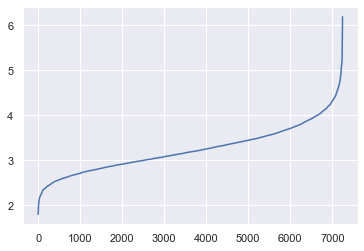

In [127]:
## ref paper: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
## medium limk: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5)
neighbors = nn.fit(df)
distances, indices = neighbors.kneighbors(df)

distances = distances.mean(axis=1)
distances = np.sort(distances, axis=0)

plt.plot(distances)

## 4.3 looks good

In [133]:
db = DBSCAN(eps=4.3, min_samples=5)
db.fit(df)
set(db.labels_)

df_db = df.copy()

df_db['cluster'] = db.labels_
df_db['cluster'].value_counts()

DBSCAN(eps=4.3)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

 0     3305
-1     1877
 1     1071
 2      550
 3      386
 4       13
 11       6
 5        6
 7        5
 10       5
 13       5
 9        5
 12       5
 8        4
 6        3
Name: cluster, dtype: int64

In [145]:
df_db[df_db['cluster'] ==7]

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,cluster
Karl Malone 1996,4.090748,9.061461,2.627824,-0.061892,3.336737,2.015918,1.647294,0.297807,2.334001,0.272009,...,-0.736772,0.219687,0.458216,-0.439077,-0.701338,-0.401365,-0.251967,-0.414915,0.230502,7
Karl Malone 1997,3.941685,8.728163,2.972792,0.213417,2.270222,1.669018,1.880696,1.985539,2.144194,0.098956,...,-0.706795,0.221561,0.184177,-0.274024,0.423071,-0.658244,0.127922,-1.101483,0.559581,7
Karl Malone 1999,3.663503,8.696571,3.129950,0.895404,2.522453,1.331147,1.969060,2.253880,1.893018,0.172638,...,-0.614499,0.261297,0.613375,-0.708927,0.000273,-0.275641,1.127602,-0.811470,0.467968,7
Karl Malone 2000,3.157193,7.602274,1.900196,0.907689,2.889040,1.265275,1.974804,2.451904,2.127273,0.194961,...,-0.488324,0.061859,1.067406,-1.024827,0.108847,0.165645,0.737227,-1.189104,0.046008,7
Karl Malone 2002,1.427515,5.507889,1.074088,1.127198,3.482146,1.323349,3.239622,2.785799,1.585350,0.462891,...,-1.370754,0.213426,0.368865,-0.948259,0.092404,0.241691,0.265522,-1.063149,0.153833,7


In [153]:
## Trying with a smaller epsilon

db = DBSCAN(eps=3.3, min_samples=6)
db.fit(df)
set(db.labels_)

df_db = df.copy()

df_db['cluster'] = db.labels_
df_db['cluster'].value_counts()

## Still not a good result

DBSCAN(eps=3.3, min_samples=6)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33}

-1     6878
 2       53
 4       44
 14      23
 11      17
 7       15
 20      14
 25      14
 0       11
 15      11
 19       9
 17       9
 6        9
 16       8
 32       8
 1        8
 33       8
 10       7
 21       7
 8        7
 27       6
 29       6
 23       6
 12       6
 3        6
 28       6
 26       6
 22       6
 5        6
 9        6
 13       6
 31       6
 24       5
 18       5
 30       4
Name: cluster, dtype: int64

### NOT a good outcome

## EM Gaussian Mixture Model

- NBA clusters most likely are NOT spherical so EM algo can get better shapes than KMeans
- Also want the soft labels

In [174]:
EM = GaussianMixture(n_components=15)
df_em = df.copy()
EM.fit(df)


GaussianMixture(n_components=15)

(7246, 15)

array([[0.00000000e+000, 0.00000000e+000, 9.99999939e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [6.33421743e-002, 5.76870575e-002, 1.98878522e-216, ...,
        2.55650717e-005, 5.11735911e-007, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.49857730e-008, ...,
        0.00000000e+000, 0.00000000e+000, 9.99999965e-001],
       ...,
       [9.99955964e-001, 3.94261760e-010, 0.00000000e+000, ...,
        8.10665431e-017, 4.36742336e-005, 0.00000000e+000],
       [1.27049236e-075, 3.90952779e-007, 0.00000000e+000, ...,
        1.65308836e-057, 1.85675338e-072, 0.00000000e+000],
       [3.45370740e-175, 4.23640400e-125, 1.44384851e-041, ...,
        1.18163637e-036, 8.94132338e-318, 0.00000000e+000]])

In [178]:
## to get probabilities:
cluster_p = EM.predict_proba(df)
cols = ['cluster_' + str(n) for n in range(15)]
df_soft_labels = pd.DataFrame(cluster_p, index=df.index, columns=cols)
df_soft_labels

(7246, 15)

array([[0.00000000e+000, 0.00000000e+000, 9.99999939e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [6.33421743e-002, 5.76870575e-002, 1.98878522e-216, ...,
        2.55650717e-005, 5.11735911e-007, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.49857730e-008, ...,
        0.00000000e+000, 0.00000000e+000, 9.99999965e-001],
       ...,
       [9.99955964e-001, 3.94261760e-010, 0.00000000e+000, ...,
        8.10665431e-017, 4.36742336e-005, 0.00000000e+000],
       [1.27049236e-075, 3.90952779e-007, 0.00000000e+000, ...,
        1.65308836e-057, 1.85675338e-072, 0.00000000e+000],
       [3.45370740e-175, 4.23640400e-125, 1.44384851e-041, ...,
        1.18163637e-036, 8.94132338e-318, 0.00000000e+000]])

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
A.C. Green 1996,0.000000e+00,0.000000e+00,9.999999e-01,6.122429e-08,0.000000,1.370698e-18,0.000000e+00,0.000000e+00,0.000000e+00,2.008901e-117,5.149479e-119,0.000000e+00,0.000000e+00,0.000000e+00,0.0
Aaron McKie 1996,6.334217e-02,5.768706e-02,1.988785e-216,4.483522e-118,0.000000,4.874722e-26,1.044724e-02,5.788415e-23,8.684975e-01,0.000000e+00,2.572837e-12,1.802432e-14,2.556507e-05,5.117359e-07,0.0
Adam Keefe 1996,0.000000e+00,0.000000e+00,3.498577e-08,2.805139e-13,0.000000,5.172773e-17,0.000000e+00,0.000000e+00,0.000000e+00,2.202815e-30,5.301266e-151,0.000000e+00,0.000000e+00,0.000000e+00,1.0
Allan Houston 1996,2.851578e-12,9.999774e-01,0.000000e+00,5.099544e-248,0.000000,1.082283e-63,2.432113e-07,5.405974e-07,1.990535e-05,0.000000e+00,6.374889e-34,7.929413e-07,1.013745e-11,1.088117e-06,0.0
Allen Iverson 1996,1.866589e-42,2.265723e-03,1.944693e-296,7.929974e-142,0.000000,3.799589e-29,9.246156e-01,3.908229e-03,4.090448e-12,0.000000e+00,1.512014e-23,6.921045e-02,2.451141e-46,3.047537e-36,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Will Barton 2019,4.718521e-15,9.811544e-01,0.000000e+00,1.231402e-232,0.000000,1.220445e-52,4.267045e-05,4.890244e-06,1.879730e-02,0.000000e+00,1.724884e-34,7.711196e-07,1.953279e-23,7.213445e-12,0.0
Willie Cauley-Stein 2019,0.000000e+00,0.000000e+00,9.779010e-09,6.511495e-15,0.000000,6.983136e-21,0.000000e+00,0.000000e+00,0.000000e+00,8.253527e-11,2.704679e-154,0.000000e+00,0.000000e+00,0.000000e+00,1.0
Wilson Chandler 2019,9.999560e-01,3.942618e-10,0.000000e+00,0.000000e+00,0.000000,2.474156e-144,2.493582e-20,1.437879e-45,3.616281e-07,0.000000e+00,3.743321e-116,1.183726e-66,8.106654e-17,4.367423e-05,0.0
Zach LaVine 2019,1.270492e-75,3.909528e-07,0.000000e+00,5.002770e-288,0.000000,3.993837e-72,1.481368e-04,9.998515e-01,3.471834e-36,0.000000e+00,1.283939e-57,1.105782e-13,1.653088e-57,1.856753e-72,0.0


In [180]:
df_soft_labels[df_soft_labels.index.str.contains('Tim Duncan')]

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
Tim Duncan 1997,0.000000e+00,0.000000e+00,1.090450e-06,4.850481e-08,0.000000,1.220978e-27,0.000000e+00,0.000000e+00,0.000000e+00,4.638271e-15,1.781089e-165,0.000000e+00,0.000000e+00,0.0,0.999999
Tim Duncan 1998,2.971926e-156,4.658742e-225,1.451445e-13,5.910577e-07,0.999999,1.389424e-27,7.070048e-138,3.255248e-27,3.944945e-214,1.290535e-11,6.027549e-17,9.048560e-86,3.538247e-101,0.0,0.000000
Tim Duncan 1999,5.333822e-188,5.509245e-260,2.661276e-18,2.458298e-05,0.999975,6.628566e-31,1.964519e-160,2.455883e-31,1.224144e-251,1.764973e-12,3.687912e-23,4.606448e-106,2.923627e-118,0.0,0.000000
Tim Duncan 2000,1.710309e-121,2.918944e-144,2.701254e-08,9.999999e-01,0.000000,7.216355e-25,2.008217e-96,2.775304e-16,1.131220e-159,1.158933e-130,5.784907e-08,1.191873e-45,4.791790e-59,0.0,0.000000
Tim Duncan 2001,2.190496e-206,1.139443e-286,4.238463e-18,7.598972e-07,0.999999,6.734503e-33,3.791281e-177,1.397352e-36,1.312124e-272,8.712542e-18,5.886345e-27,4.489476e-115,1.244731e-132,0.0,0.000000
Tim Duncan 2002,3.539464e-155,1.107800e-175,8.723285e-22,1.000000e+00,0.000000,3.455733e-29,2.394471e-118,1.438610e-20,1.193251e-191,0.000000e+00,2.019699e-12,4.304574e-61,3.760301e-93,0.0,0.000000
Tim Duncan 2003,9.530040e-263,1.200580e-321,1.124186e-20,1.000000e+00,0.000000,1.194599e-37,6.642126e-186,3.284467e-93,0.000000e+00,2.540957e-102,3.688088e-47,1.298359e-145,2.623449e-136,0.0,0.000000
Tim Duncan 2004,2.629253e-156,7.104513e-201,4.139714e-18,1.730268e-08,1.000000,1.143098e-33,4.355686e-131,5.107379e-28,1.953958e-207,2.745303e-22,8.925249e-17,1.091809e-65,4.593910e-83,0.0,0.000000
Tim Duncan 2005,1.777816e-259,0.000000e+00,7.242453e-14,1.000000e+00,0.000000,7.712461e-28,4.679633e-215,1.224288e-162,0.000000e+00,1.244186e-18,7.216014e-53,1.383645e-199,3.386627e-172,0.0,0.000000
Tim Duncan 2006,0.000000e+00,0.000000e+00,1.357739e-09,1.000000e+00,0.000000,4.710918e-25,0.000000e+00,0.000000e+00,0.000000e+00,2.271976e-46,5.796195e-127,0.000000e+00,0.000000e+00,0.0,0.000000


In [166]:
## quick comparison of hard labels to kmeans

labels = EM.predict(df)
df_em['cluster'] = labels
df_em['cluster'].value_counts()

3     1393
9      843
6      593
2      590
10     577
1      571
14     518
12     508
4      430
11     347
13     260
7      202
0      184
8      118
5      112
Name: cluster, dtype: int64

In [167]:
## with 15 clusters

player = 'LeBron'
df_em[df_em.index.str.contains(player)]['cluster']

player = 'Kobe'
df_em[df_em.index.str.contains(player)]['cluster']

player = 'Gary Payton'
df_em[df_em.index.str.contains(player)]['cluster']

player = "Shaquille O'Neal"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Dwight Howard"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Eddie House"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Dirk"
df_em[df_em.index.str.contains(player)]['cluster']

player = "James Harden"
df_em[df_em.index.str.contains(player)]['cluster']

player = "JJ Redick"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Kevin Durant"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Klay Thompson"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Yao Ming"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Paul Pierce"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Kevin Garnett"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Pau Gasol"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Derrick Rose"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Steve Nash"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Deron Williams"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Jason Kidd"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Paul George"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Russell Westbrook"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Lou Williams"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Jamal Crawford"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Allen Iverson"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Carmelo Anthony"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Ben Wallace"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Danny Granger"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Roy Hibbert"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Lance Stephenson"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Richard Hamilton"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Marcus Camby"
df_em[df_em.index.str.contains(player)]['cluster']

player = "Tim Duncan"
df_em[df_em.index.str.contains(player)]['cluster']

LeBron James 2003    13
LeBron James 2004     7
LeBron James 2005     7
LeBron James 2006     7
LeBron James 2007     7
LeBron James 2008     7
LeBron James 2009     7
LeBron James 2010     7
LeBron James 2011     7
LeBron James 2012     7
LeBron James 2013     7
LeBron James 2014     7
LeBron James 2015     7
LeBron James 2016     7
LeBron James 2017     7
LeBron James 2018     7
LeBron James 2019     7
Name: cluster, dtype: int64

Kobe Bryant 1996     4
Kobe Bryant 1997    12
Kobe Bryant 1998    11
Kobe Bryant 1999     7
Kobe Bryant 2000     7
Kobe Bryant 2001     7
Kobe Bryant 2002     7
Kobe Bryant 2003     7
Kobe Bryant 2004     7
Kobe Bryant 2005     7
Kobe Bryant 2006     7
Kobe Bryant 2007     7
Kobe Bryant 2008     7
Kobe Bryant 2009     7
Kobe Bryant 2010     7
Kobe Bryant 2011     7
Kobe Bryant 2012     7
Kobe Bryant 2014     7
Kobe Bryant 2015     9
Name: cluster, dtype: int64

Gary Payton 1996    13
Gary Payton 1997    13
Gary Payton 1998    13
Gary Payton 1999    13
Gary Payton 2000    13
Gary Payton 2001    13
Gary Payton 2002    13
Gary Payton 2003     2
Gary Payton 2004     2
Gary Payton 2005     2
Gary Payton 2006     4
Name: cluster, dtype: int64

Shaquille O'Neal 1996    8
Shaquille O'Neal 1997    8
Shaquille O'Neal 1998    8
Shaquille O'Neal 1999    8
Shaquille O'Neal 2000    8
Shaquille O'Neal 2001    8
Shaquille O'Neal 2002    8
Shaquille O'Neal 2003    8
Shaquille O'Neal 2004    8
Shaquille O'Neal 2005    8
Shaquille O'Neal 2006    8
Shaquille O'Neal 2007    3
Shaquille O'Neal 2008    8
Shaquille O'Neal 2009    8
Shaquille O'Neal 2010    3
Name: cluster, dtype: int64

Dwight Howard 2004    3
Dwight Howard 2005    3
Dwight Howard 2006    6
Dwight Howard 2007    3
Dwight Howard 2008    8
Dwight Howard 2009    3
Dwight Howard 2010    8
Dwight Howard 2011    8
Dwight Howard 2012    6
Dwight Howard 2013    6
Dwight Howard 2014    6
Dwight Howard 2015    3
Dwight Howard 2016    3
Dwight Howard 2017    6
Dwight Howard 2019    6
Name: cluster, dtype: int64

Eddie House 2001     2
Eddie House 2002     4
Eddie House 2003     4
Eddie House 2004     4
Eddie House 2005     9
Eddie House 2006     9
Eddie House 2007    10
Eddie House 2008    10
Eddie House 2009     9
Eddie House 2010    10
Name: cluster, dtype: int64

Dirk Nowitzki 1998    11
Dirk Nowitzki 1999    12
Dirk Nowitzki 2000     7
Dirk Nowitzki 2001     7
Dirk Nowitzki 2002     7
Dirk Nowitzki 2003     7
Dirk Nowitzki 2004     7
Dirk Nowitzki 2005     7
Dirk Nowitzki 2006     7
Dirk Nowitzki 2007     7
Dirk Nowitzki 2008     7
Dirk Nowitzki 2009     7
Dirk Nowitzki 2010     7
Dirk Nowitzki 2011     7
Dirk Nowitzki 2012     7
Dirk Nowitzki 2013     7
Dirk Nowitzki 2014     7
Dirk Nowitzki 2015     7
Dirk Nowitzki 2016     1
Dirk Nowitzki 2017     1
Dirk Nowitzki 2018    10
Name: cluster, dtype: int64

James Harden 2009     9
James Harden 2010    12
James Harden 2011     2
James Harden 2012    13
James Harden 2013    13
James Harden 2014     7
James Harden 2015     7
James Harden 2016     7
James Harden 2017     7
James Harden 2018     7
James Harden 2019     7
Name: cluster, dtype: int64

JJ Redick 2008    14
JJ Redick 2009     9
JJ Redick 2010    14
JJ Redick 2011     9
JJ Redick 2012     9
JJ Redick 2013    14
JJ Redick 2014     9
JJ Redick 2015     9
JJ Redick 2016     9
JJ Redick 2017     9
JJ Redick 2018     9
JJ Redick 2019     9
Name: cluster, dtype: int64

Kevin Durant 2007    12
Kevin Durant 2008     7
Kevin Durant 2009     7
Kevin Durant 2010     7
Kevin Durant 2011     7
Kevin Durant 2012     7
Kevin Durant 2013     7
Kevin Durant 2014     7
Kevin Durant 2015     7
Kevin Durant 2016     7
Kevin Durant 2017     7
Kevin Durant 2018     7
Name: cluster, dtype: int64

Klay Thompson 2011    9
Klay Thompson 2012    9
Klay Thompson 2013    9
Klay Thompson 2014    9
Klay Thompson 2015    9
Klay Thompson 2016    9
Klay Thompson 2017    9
Klay Thompson 2018    9
Name: cluster, dtype: int64

Yao Ming 2002    6
Yao Ming 2003    3
Yao Ming 2004    3
Yao Ming 2005    3
Yao Ming 2006    3
Yao Ming 2007    3
Yao Ming 2008    6
Name: cluster, dtype: int64

Paul Pierce 1998    12
Paul Pierce 1999    12
Paul Pierce 2000     7
Paul Pierce 2001     7
Paul Pierce 2002     7
Paul Pierce 2003     7
Paul Pierce 2004    12
Paul Pierce 2005     7
Paul Pierce 2006     7
Paul Pierce 2007    12
Paul Pierce 2008    12
Paul Pierce 2009    12
Paul Pierce 2010    12
Paul Pierce 2011     7
Paul Pierce 2012     7
Paul Pierce 2013    12
Paul Pierce 2014     9
Paul Pierce 2015     9
Name: cluster, dtype: int64

Kevin Garnett 1996     6
Kevin Garnett 1997     6
Kevin Garnett 1998     6
Kevin Garnett 1999    11
Kevin Garnett 2000     8
Kevin Garnett 2001    11
Kevin Garnett 2002     8
Kevin Garnett 2003     8
Kevin Garnett 2004     8
Kevin Garnett 2005     8
Kevin Garnett 2006     8
Kevin Garnett 2007     3
Kevin Garnett 2008     6
Kevin Garnett 2009     5
Kevin Garnett 2010     5
Kevin Garnett 2011     8
Kevin Garnett 2012     6
Kevin Garnett 2013     3
Kevin Garnett 2014     6
Name: cluster, dtype: int64

Pau Gasol 2001     6
Pau Gasol 2002     6
Pau Gasol 2003     6
Pau Gasol 2004     6
Pau Gasol 2005     6
Pau Gasol 2006     6
Pau Gasol 2007     6
Pau Gasol 2008     6
Pau Gasol 2009     3
Pau Gasol 2010     6
Pau Gasol 2011    11
Pau Gasol 2012     6
Pau Gasol 2013     8
Pau Gasol 2014     6
Pau Gasol 2015    11
Pau Gasol 2016    11
Pau Gasol 2017     1
Name: cluster, dtype: int64

Derrick Rose 2008     0
Derrick Rose 2009    13
Derrick Rose 2010    13
Derrick Rose 2011    13
Derrick Rose 2014     2
Derrick Rose 2015    13
Derrick Rose 2016    13
Derrick Rose 2018    13
Derrick Rose 2019    13
Name: cluster, dtype: int64

Steve Nash 1997    14
Steve Nash 1998    14
Steve Nash 1999    14
Steve Nash 2000     2
Steve Nash 2001     2
Steve Nash 2002     2
Steve Nash 2003     2
Steve Nash 2004     2
Steve Nash 2005     2
Steve Nash 2006     2
Steve Nash 2007     2
Steve Nash 2008     2
Steve Nash 2009     2
Steve Nash 2010     2
Steve Nash 2011     2
Steve Nash 2012     2
Name: cluster, dtype: int64

Deron Williams 2005     2
Deron Williams 2006     2
Deron Williams 2007     2
Deron Williams 2008     2
Deron Williams 2009     2
Deron Williams 2010     2
Deron Williams 2011     7
Deron Williams 2012    12
Deron Williams 2013     2
Deron Williams 2014     2
Deron Williams 2015     2
Deron Williams 2016     2
Name: cluster, dtype: int64

Jason Kidd 1996     2
Jason Kidd 1997     2
Jason Kidd 1998     2
Jason Kidd 1999     2
Jason Kidd 2000     2
Jason Kidd 2001     2
Jason Kidd 2002     2
Jason Kidd 2003     2
Jason Kidd 2004    14
Jason Kidd 2005    14
Jason Kidd 2006    14
Jason Kidd 2007    14
Jason Kidd 2008    14
Jason Kidd 2009    14
Jason Kidd 2010    14
Jason Kidd 2011    14
Jason Kidd 2012    10
Name: cluster, dtype: int64

Paul George 2010     4
Paul George 2011    12
Paul George 2012     9
Paul George 2013    12
Paul George 2015     7
Paul George 2016     7
Paul George 2017     9
Paul George 2018     7
Paul George 2019    13
Name: cluster, dtype: int64

Russell Westbrook 2008    13
Russell Westbrook 2009     0
Russell Westbrook 2010     7
Russell Westbrook 2011    13
Russell Westbrook 2012     7
Russell Westbrook 2013     7
Russell Westbrook 2014     7
Russell Westbrook 2015     7
Russell Westbrook 2016     7
Russell Westbrook 2017     7
Russell Westbrook 2018     7
Russell Westbrook 2019     7
Name: cluster, dtype: int64

Lou Williams 2007     2
Lou Williams 2008     2
Lou Williams 2009    13
Lou Williams 2010    13
Lou Williams 2011    13
Lou Williams 2012     2
Lou Williams 2013     2
Lou Williams 2014    12
Lou Williams 2015    12
Lou Williams 2016    13
Lou Williams 2017    13
Lou Williams 2018    13
Lou Williams 2019    13
Name: cluster, dtype: int64

Jamal Crawford 2000    14
Jamal Crawford 2001    14
Jamal Crawford 2002     9
Jamal Crawford 2003     2
Jamal Crawford 2004     9
Jamal Crawford 2005    12
Jamal Crawford 2006    12
Jamal Crawford 2007    12
Jamal Crawford 2008    12
Jamal Crawford 2009     9
Jamal Crawford 2010    12
Jamal Crawford 2011    12
Jamal Crawford 2012     9
Jamal Crawford 2013     9
Jamal Crawford 2014     9
Jamal Crawford 2015    12
Jamal Crawford 2016    12
Jamal Crawford 2017    14
Jamal Crawford 2018     2
Name: cluster, dtype: int64

Allen Iverson 1996    12
Allen Iverson 1997    13
Allen Iverson 1998     7
Allen Iverson 1999     7
Allen Iverson 2000     7
Allen Iverson 2001     7
Allen Iverson 2002     7
Allen Iverson 2003     7
Allen Iverson 2004     7
Allen Iverson 2005     7
Allen Iverson 2006     7
Allen Iverson 2007     7
Allen Iverson 2008     7
Allen Iverson 2009    12
Name: cluster, dtype: int64

Carmelo Anthony 2003    12
Carmelo Anthony 2004    12
Carmelo Anthony 2005    11
Carmelo Anthony 2006    11
Carmelo Anthony 2007    11
Carmelo Anthony 2008     7
Carmelo Anthony 2009     7
Carmelo Anthony 2010     7
Carmelo Anthony 2011     7
Carmelo Anthony 2012     7
Carmelo Anthony 2013     7
Carmelo Anthony 2014     7
Carmelo Anthony 2015     7
Carmelo Anthony 2016     7
Carmelo Anthony 2017     9
Carmelo Anthony 2019     9
Name: cluster, dtype: int64

Ben Wallace 1997    3
Ben Wallace 1998    3
Ben Wallace 1999    3
Ben Wallace 2000    5
Ben Wallace 2001    3
Ben Wallace 2002    5
Ben Wallace 2003    5
Ben Wallace 2004    5
Ben Wallace 2005    3
Ben Wallace 2006    5
Ben Wallace 2007    3
Ben Wallace 2008    3
Ben Wallace 2009    3
Ben Wallace 2010    5
Ben Wallace 2011    5
Name: cluster, dtype: int64

Danny Granger 2005     4
Danny Granger 2006     1
Danny Granger 2007    12
Danny Granger 2008     7
Danny Granger 2009    12
Danny Granger 2010    12
Danny Granger 2011    12
Danny Granger 2013    10
Danny Granger 2014    10
Name: cluster, dtype: int64

Roy Hibbert 2008    3
Roy Hibbert 2009    6
Roy Hibbert 2010    3
Roy Hibbert 2011    3
Roy Hibbert 2012    6
Roy Hibbert 2013    6
Roy Hibbert 2014    3
Roy Hibbert 2015    3
Name: cluster, dtype: int64

Lance Stephenson 2012     1
Lance Stephenson 2013    12
Lance Stephenson 2014     2
Lance Stephenson 2015    12
Lance Stephenson 2017    12
Lance Stephenson 2018     9
Name: cluster, dtype: int64

Richard Hamilton 1999     4
Richard Hamilton 2000    11
Richard Hamilton 2001    11
Richard Hamilton 2002    11
Richard Hamilton 2003    11
Richard Hamilton 2004    11
Richard Hamilton 2005    11
Richard Hamilton 2006    11
Richard Hamilton 2007    11
Richard Hamilton 2008    12
Richard Hamilton 2009    12
Richard Hamilton 2010    12
Richard Hamilton 2011     4
Richard Hamilton 2012    11
Name: cluster, dtype: int64

Marcus Camby 1996    6
Marcus Camby 1997    3
Marcus Camby 1998    3
Marcus Camby 1999    6
Marcus Camby 2000    5
Marcus Camby 2001    3
Marcus Camby 2002    5
Marcus Camby 2003    3
Marcus Camby 2004    3
Marcus Camby 2005    6
Marcus Camby 2006    3
Marcus Camby 2007    6
Marcus Camby 2008    6
Marcus Camby 2009    6
Marcus Camby 2010    3
Marcus Camby 2011    6
Name: cluster, dtype: int64

Tim Duncan 1997    3
Tim Duncan 1998    6
Tim Duncan 1999    6
Tim Duncan 2000    8
Tim Duncan 2001    6
Tim Duncan 2002    8
Tim Duncan 2003    8
Tim Duncan 2004    6
Tim Duncan 2005    8
Tim Duncan 2006    8
Tim Duncan 2007    3
Tim Duncan 2008    3
Tim Duncan 2009    6
Tim Duncan 2010    3
Tim Duncan 2011    3
Tim Duncan 2012    6
Tim Duncan 2013    3
Tim Duncan 2014    6
Tim Duncan 2015    3
Name: cluster, dtype: int64

In [169]:
df_em[df_em['cluster']==3][0:1300:50]

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,hard cluster,cluster
Adam Keefe 1996,6.500730,-3.015961,-1.444161,-0.124259,2.182097,-2.216806,-1.109648,2.042181,1.126785,1.171175,...,-0.477892,0.178708,0.655030,-0.209013,-0.073784,-0.167154,-0.136384,-0.241275,3,3
Theo Ratliff 1996,8.008105,-1.092575,0.619129,1.829106,1.289394,-1.625486,-2.336551,-0.737694,0.555416,-2.023959,...,-0.284759,0.496129,0.333255,-0.107231,-0.568984,0.539458,0.351470,-0.473844,3,3
Juwan Howard 1997,2.919394,3.530863,-1.283686,1.834400,2.369727,1.575703,0.137364,0.595968,0.231029,0.137336,...,1.373738,-0.791950,-0.331800,-0.626341,-0.706586,0.370046,0.146530,-0.195923,3,3
David Robinson 1998,6.797047,4.649555,-0.083065,-0.451424,0.691852,-0.445231,1.591745,2.381587,2.294390,1.693480,...,-0.034356,0.038720,-0.157954,-0.435981,-0.616099,0.128007,-0.020262,0.244598,3,3
Antonio Davis 1999,6.784121,1.734131,-0.337811,1.187299,0.863965,-0.259888,-0.791611,2.685450,-2.370646,0.140046,...,-1.037670,-0.489206,-0.192634,-0.364994,-0.430408,0.216360,-0.061891,0.069638,3,3
Rasho Nesterovic 1999,6.651214,-2.991298,-1.718487,0.419358,0.001957,1.713194,-1.003527,-0.760914,-0.407444,-1.479349,...,0.315332,-0.765322,-0.155922,-0.312178,0.241457,-0.050504,0.586015,-0.272959,3,3
Keon Clark 2000,7.248248,1.148625,-0.826999,0.792148,0.452047,-1.060035,-1.016163,-0.184862,-0.948129,-0.953266,...,-0.881340,-0.010750,-0.726513,0.108222,-0.493828,-0.269070,-0.261121,0.216189,3,3
Hakeem Olajuwon 2001,5.953276,-0.286655,-2.971630,0.830587,0.088820,0.384959,3.006517,-1.504671,0.996831,-0.982814,...,-1.956440,0.664742,-0.613809,0.665262,-1.535721,0.266602,0.386124,0.025660,3,3
Antonio Davis 2002,4.889220,3.003040,-1.180872,2.785825,-0.259478,1.458122,-0.313619,2.392555,-1.665315,1.774323,...,-0.448783,-0.390117,-0.201497,-0.205931,-1.200605,0.413909,0.095289,-0.090887,3,3
Reggie Evans 2002,7.911403,-3.342367,-4.473398,-1.113090,-1.015474,-2.328962,-1.060298,3.317639,-2.801670,0.769478,...,1.169161,-1.025471,-0.719764,0.879596,-1.259526,0.113896,-0.013579,-0.087469,3,3


### Determining number clusters by GMM model likelihood

- Bayesian Information Criterion (BIC)
- Akaike Information Criterion (AIC)


Wall time: 1min 17s


Text(0.5, 0, 'Number components')

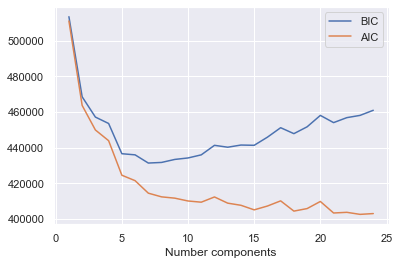

In [15]:
%%time
range_n_components = np.arange(1,25)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]

plt.plot(range_n_components, [model.bic(df) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components');